# PCA with the iris dataset

#### Bibliography:
1. [An intuitive approach to PCA](https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19)
2. [PCA using Python](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

The iris dataset is often used to experiment with data science techniques. It’s small, only 150 rows, with four features, petal length and width, and sepal length and width. The clusters are extremely easy to see, the data requires no preprocessing, and there are only 3 targets, corresponding to the clusters above:
Iris setosa, Iris Versicolor, and Iris virginica.

## PCA

PCA stands for *Principal Component Analysis*, and refers to recombinations of your original data (the principal components).

As a rule of thumb, PCA is useful for reducing the size of data, particularly data with many features, while retaining the ability to model. This is a highly intelligible way, though watered down, of saying "PCA uses singular value decomposition to find orthogonal, recombined principle components from the original features which can explain most of the variance in the original data with remarkably less memory".

0. Import the usual libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

1. Import the data from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [2]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                     names=['sepal length','sepal width','petal length','petal width', "target"])

In [3]:
dataset.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


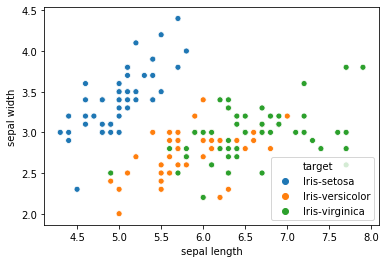

In [4]:
sns.scatterplot(x=dataset["sepal length"], 
                y=dataset["sepal width"], 
                hue=dataset["target"],
                data = dataset)

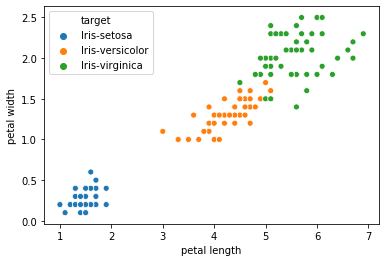

In [5]:
sns.scatterplot(x=dataset["petal length"], 
                y=dataset["petal width"], 
                hue=dataset["target"],
                data = dataset)

# sns.catplot(x = "petal length", y = "petal width", hue = "target", data = dataset)

In both cases we can easily distinguish the three types of Iris. This is important, because it tells us that both the sepal features and the petal features independently contain explanatory information relating to the type of Iris, i.e. the target class.

2. Split in ```X``` (explanatory/independent variables) and ```y``` target variable

In [6]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

3. Normalise the independent variable and put it in a DataFrame (this is done so all the variables are on the same scale, even if in this case they were all measured in cm). Let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
scaled_features = sc_x.fit_transform(X)

In [8]:
X = pd.DataFrame(scaled_features, columns=['sepal length','sepal width','petal length','petal width'])
X.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## PCA Projection to 2D

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

4. Import PCA and initialize to 2 principal components

In [9]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

The parameter `n_components` allows us to select how many principle components we want to reduce our features to, in this case 2. Let’s look at the Iris dataset again, now with only two features. (In other words, we’ve reduced the size of our data by 50%).

5. Apply PCA to `X` and put it in a dataframe `principalDF`

In [10]:
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDF.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


6. Visualize the result of the PCA. In a scatterplot, put on the x-axis le first component, on the y-axis the second component, and as `hue` the target variable.

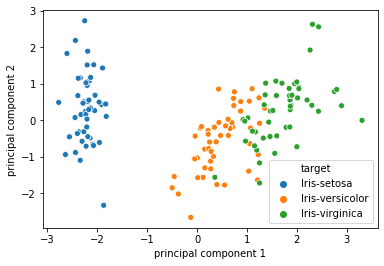

In [11]:
sns.scatterplot(x=principalDF.columns[0], 
                y=principalDF.columns[1], 
                hue=dataset.columns[-1],
                data = pd.concat([principalDF, dataset.target], axis=1))

Even though we’ve reduced our data by half, we still have two principle components which contain the majority of the statistical variance in the original data, and clustering or classification would still be an easy task.

Even if we reduce all four components to just one, throwing out a massive 75% of our original data:

In [12]:
pcasolo = PCA(n_components = 1)
solo_PrincipalComponent = pcasolo.fit_transform(X)

In [13]:
df_solo = pd.DataFrame(data = solo_PrincipalComponent, columns = ['principal component 1'])
df_solo.head()

,principal component 1
0,-2.264542
1,-2.086426
2,-2.367950
3,-2.304197
4,-2.388777


Then we still end up with a remarkably effective single principle component for the purposes of clustering and classification:

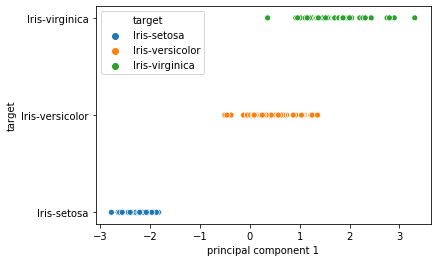

In [14]:
sns.scatterplot(x=df_solo.columns[0],
                y=dataset.columns[-1],
                # y=1,
                hue=dataset.columns[-1],
                data = pd.concat([df_solo, dataset.target], axis=1))

7. Look at the *explained variance*, what can you say?

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space (or 1-dim), you lose some of the variance (information) when you do this. By using the attribute `explained_variance_ratio_`, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [17]:
pca.explained_variance_ratio_, pcasolo.explained_variance_ratio_

(array([0.72770452, 0.23030523]), array([0.72770452]))

Through PCA, we can reduce the number of features we have, while retaining the explanatory statistical variance responsible for modeling. It may seem like a neat extension of the same old preprocessing and cleaning steps, but PCA is so effective that it almost blurs the lines between preprocessing and modeling. In the above case, PCA allowed us to create a mere number line which captures the relationships we were initially looking for in the data for determining Iris type. The advantages of this are enormous, not just for feature reduction, but for speeding up models with limited computational resources. 

In [16]:
#pca?